In [1]:
#import necessary libraries:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

#Get the IRIS dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
data = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])
 
#Features
X = data.iloc[:,0:4]
 
#Target
target = data.iloc[:,4]
#Combine features and target in a dataframe:
df = pd.concat([X, target], axis=1)
df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:
def PCA_manual(X , n_components):
    '''
        This function takes in features and the desired component number. 
        It subtracts mean values of features 
        from the original values to normalize them and calculates the 
        covariance matrix of the normalized features.
        It, then, calculates the eigenvalues and eigenvectors 
        of the covariance matrix, sorts eigenvalues and eigenvectors 
        from the greatest to smallest. It subsets the 
        eigenvectors according to the given 
        number of components. These vectors are 
        multiplied by the normalized features to obtain new 
        features. New features are returned.'''    
    #normalize features
    X_norm = X - np.mean(X , axis = 0)
     
    #Calculate convariance matrix
    cov_mat = np.cov(X_norm , rowvar = False)
     
    #Calculate eigenvalues and eigenvectors
    eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)
    #Sort the eigenvalues
    sort_index = np.argsort(eigen_values)[::-1]
    sort_eigenvalue = eigen_values[sort_index]
    #Sort the eigenvectors 
    sort_eigenvectors = eigen_vectors[:,sort_index]
    #Subset the eigenvector 
    eigenvector_n_comp = sort_eigenvectors[:,0:n_components]
    #Calculate new features:
    new_features= np.dot(eigenvector_n_comp.transpose() , X_norm.transpose() ).transpose()
     #Return new features
    return new_features

In [3]:
one_comp = PCA_manual(X, 1)
one_comp_feat = pd.DataFrame(one_comp , columns = ['PC1'])

#Combine PCA1 with target variable to create a complete Dataset
one_comp_df = pd.concat([one_comp_feat ,pd.DataFrame(target)] , axis = 1)
#To plot the First Principal Component, we need a one dimensional number line where y=0:
one_comp_df["y"]=0
one_comp_df.head()

,PC1,target,y
0,2.684207,Iris-setosa,0
1,2.715391,Iris-setosa,0
2,2.889820,Iris-setosa,0
3,2.746437,Iris-setosa,0
4,2.728593,Iris-setosa,0


In [4]:
#Check whether sklearn's PCA produces the same results?
#import PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
#PCA1 is stored in x_new
x_new = pca.fit_transform(X)
#flatten the matrix
x_new_flat = x_new.flatten()
#Round the numbers so we can compare
x_new_rounded = []
for i in x_new_flat:
    x_new_rounded.append(round(i, 2))
print("Sklearn's PCA results: ", x_new_rounded)

one_comp_df_rounded =( -1)*(one_comp_df['PC1'].round(2))
print("-----------")
print("Our PCA's results: ", one_comp_df_rounded.values)
check_same = one_comp_df_rounded==x_new_rounded
print("-----------")
print("In {} cases (all instances) PCA1s match.".format(check_same.sum()))

Sklearn's PCA results:  [-2.68, -2.72, -2.89, -2.75, -2.73, -2.28, -2.82, -2.63, -2.89, -2.67, -2.51, -2.61, -2.79, -3.23, -2.64, -2.38, -2.62, -2.65, -2.2, -2.59, -2.31, -2.54, -3.22, -2.3, -2.36, -2.51, -2.47, -2.56, -2.64, -2.63, -2.59, -2.41, -2.65, -2.6, -2.67, -2.87, -2.63, -2.67, -2.98, -2.59, -2.77, -2.85, -3.0, -2.41, -2.21, -2.72, -2.54, -2.84, -2.54, -2.7, 1.28, 0.93, 1.46, 0.18, 1.09, 0.64, 1.1, -0.75, 1.04, -0.01, -0.51, 0.51, 0.26, 0.98, -0.17, 0.93, 0.66, 0.23, 0.94, 0.04, 1.12, 0.36, 1.3, 0.92, 0.71, 0.9, 1.33, 1.56, 0.81, -0.31, -0.07, -0.19, 0.13, 1.38, 0.59, 0.81, 1.22, 0.81, 0.25, 0.16, 0.46, 0.89, 0.23, -0.71, 0.36, 0.33, 0.38, 0.64, -0.91, 0.3, 2.53, 1.41, 2.62, 1.97, 2.35, 3.4, 0.52, 2.93, 2.32, 2.92, 1.66, 1.8, 2.17, 1.34, 1.59, 1.9, 1.95, 3.49, 3.79, 1.3, 2.43, 1.2, 3.5, 1.39, 2.28, 2.61, 1.26, 1.29, 2.12, 2.39, 2.84, 3.23, 2.16, 1.44, 1.78, 3.08, 2.14, 1.9, 1.17, 2.11, 2.31, 1.92, 1.41, 2.56, 2.42, 1.94, 1.53, 1.76, 1.9, 1.39]
-----------
Our PCA's results:  [

Text(0.5, 1.0, 'Features transformed to 1D by PCA')

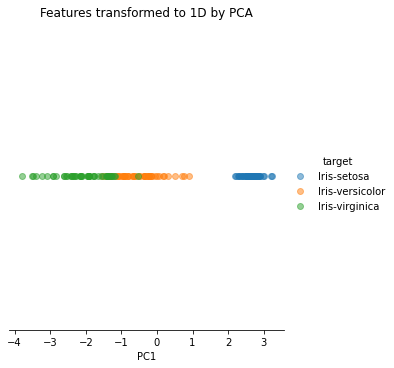

In [5]:
#Plot the projected data points o a number line
ax=sns.lmplot(data=one_comp_df,x='PC1',y='y', hue='target', scatter_kws={'alpha':0.5},fit_reg=False)
ax = plt.gca()
#hide y-axis 
ax.get_yaxis().set_visible(False)
ax.spines['left'].set_visible(False)
plt.ylim(-0.05, 0.05)
plt.title("Features transformed to 1D by PCA")

In [6]:
#Applying PCA_manual 
two_comp= PCA_manual(X , 2)
 
#Creating a Pandas DataFrame of reduced Dataset
two_comp_feat = pd.DataFrame(two_comp , columns = ['PC1','PC2'])
 
#Combine it with target variable to create a complete Dataset
two_comp_df= pd.concat([two_comp_feat , pd.DataFrame(target)] , axis = 1)
two_comp_df.head()

,PC1,PC2,target
0,2.684207,0.326607,Iris-setosa
1,2.715391,-0.169557,Iris-setosa
2,2.889820,-0.137346,Iris-setosa
3,2.746437,-0.311124,Iris-setosa
4,2.728593,0.333925,Iris-setosa


Text(0.5, 1.0, 'Features Transformed to 2D by PCA')

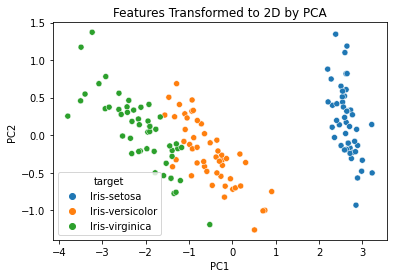

In [7]:
sns.scatterplot(data=two_comp_df, x='PC1', y='PC2', hue='target')
plt.title("Features Transformed to 2D by PCA")

In [8]:
#Applying PCA_manual with 3 components
three_comp = PCA_manual(X , 3)
 
#Creating a Pandas DataFrame of reduced Dataset
three_comp_feat = pd.DataFrame(three_comp, columns = ['PC1','PC2','PC3'])
 
#Combine PCAs with target variable to create a complete Dataset
three_comp_df = pd.concat([three_comp_feat, pd.DataFrame(target)] , axis = 1)
three_comp_df.head()

,PC1,PC2,PC3,target
0,2.684207,0.326607,0.021512,Iris-setosa
1,2.715391,-0.169557,0.203521,Iris-setosa
2,2.889820,-0.137346,-0.024709,Iris-setosa
3,2.746437,-0.311124,-0.037672,Iris-setosa
4,2.728593,0.333925,-0.096230,Iris-setosa


/tmp/ipykernel_5097/1931154332.py:4: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


Text(0.5, 0.92, 'Features Transformed to 3D by PCA')

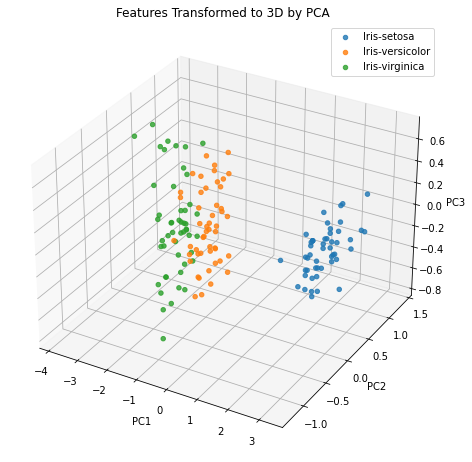

In [9]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig)

for grp_name, grp_idx in three_comp_df.groupby('target').groups.items():
    x = three_comp_df.iloc[grp_idx,0]
    y = three_comp_df.iloc[grp_idx,1]
    z = three_comp_df.iloc[grp_idx,2]
    ax.scatter(x,y,z, label=grp_name, alpha=0.8)  
plt.legend()
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.title("Features Transformed to 3D by PCA")

Text(0.5, 1.0, 'Separation between Iris-versicolor and Iris-virginica')

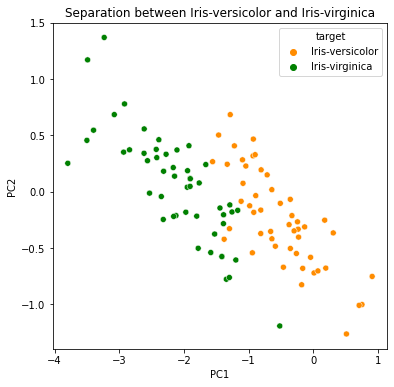

In [10]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot()
df = three_comp_df[['PC1', 'PC2','target']]
df2 = df[df['target']!='Iris-setosa']
sns.scatterplot(data=df2, x='PC1',y='PC2', hue='target', palette=['darkorange', 'green'])
plt.title("Separation between Iris-versicolor and Iris-virginica")

[0.02368303 0.07852391 0.24224357 4.22484077]


,Percent of Data Packed in each PCA
PCA1,92.461621
PCA2,5.301557
PCA3,1.718514
PCA4,0.518309


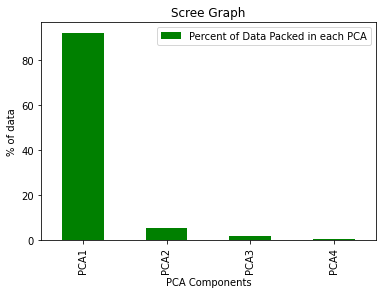

In [12]:
cov_mat = np.cov(X.T)
eigen_vals, eigen_vecs = np.linalg.eigh(cov_mat)
print(eigen_vals)

total = sum(eigen_vals)
variance = [(i/total)*100 for i in sorted(eigen_vals, reverse=True)]
packed = pd.DataFrame(variance, columns=['Percent of Data Packed in each PCA'], index=['PCA1','PCA2','PCA3','PCA4'])
packed.plot(kind='bar', color='g')
plt.title('Scree Graph')
plt.ylabel('% of data')
plt.xlabel('PCA Components')
packed.head()

In [13]:
#prepare the data
X = data.iloc[:,0:4].values
 
#prepare the target
y = data.iloc[:,4]
#df = pd.concat([X, y], axis=1)
#df
y.replace({"Iris-setosa":1, "Iris-versicolor":2, "Iris-virginica":3}, inplace=True)

sc=StandardScaler()
X=sc.fit_transform(X)
y = y.values

In [14]:
#For each class, compute the mean vector
class1 = X[y==1]
class2 = X[y==2]
class3 = X[y==3]
feat_mean_vec =[np.mean(class1, axis=0), np.mean(class2, axis=0), np.mean(class3, axis=0)] 
feat_mean_vec

[array([-1.01457897,  0.84230679, -1.30487835, -1.25512862]),
 array([ 0.11228223, -0.65718442,  0.28508673,  0.16740892]),
 array([ 0.90229674, -0.18512237,  1.01979162,  1.08771971])]

In [15]:
#Calculate within class scatter matrix Sw
Sw=np.cov(class1.T)+np.cov(class2.T)+np.cov(class3.T)
Sw

array([[1.16722735, 0.78296373, 0.34611786, 0.18386817],
       [0.78296373, 1.8615894 , 0.21806165, 0.30505192],
       [0.34611786, 0.21806165, 0.1796358 , 0.09541594],
       [0.18386817, 0.30505192, 0.09541594, 0.21784923]])

In [16]:
mean_X = np.mean(X, axis=0)

In [17]:
#Calculate between-class scatter matrix Sb
f = 4
Sb = np.zeros((f,f))
for i, f_mean in enumerate(feat_mean_vec):
    n=X[y==i+1,:].shape[0]
    f_mean = f_mean.reshape(f,1)
    mean_X = mean_X.reshape(f,1)
    Sb += n*(f_mean-mean_X).dot((f_mean-mean_X).T)
#Calculate Sb/Sw by inversing Sw and multiplying it by Sb:
#Find eigenvalues and eigenvectors: 
eig_val , eig_vec = np.linalg.eig(np.linalg.inv(Sw).dot(Sb))

In [18]:
eig_val

array([ 1.58132593e+03,  1.36007763e+01,  1.17561283e-13, -3.32658721e-13])

In [19]:
#Find the eigenvector corresponding to the greatest eigenvalue
#LDA1 requires the first component only:
sort_index = np.argsort(eig_val)[::-1]
sort_eigenvalue = eig_val[sort_index]
sort_eigenvectors = eig_vec[:,sort_index]
eigenvector_first_comp = sort_eigenvectors[:,0]

In [20]:
#w has the first eigenvector 
w = eigenvector_first_comp[:, np.newaxis]
w

array([[-0.1497757 ],
       [-0.14817298],
       [ 0.85112189],
       [ 0.48083628]])

In [21]:
#Project the samples onto the new feature subspace using the transformation matrix w
LDA = X.dot(w)

In [22]:
#Create a dataframe that has the new feature
lda_df = pd.DataFrame(LDA , columns = ['LDA1'])

#Combine it with target variable to create a complete Dataset
lda_target = pd.concat([lda_df ,pd.DataFrame(y, columns = ["target"])] , axis = 1)
#To graph on a number line where y=0:
lda_target["y"]=0
lda_target.head()

,LDA1,target,y
0,-1.790936,1,0
1,-1.583202,1,0
2,-1.663881,1,0
3,-1.514646,1,0
4,-1.807076,1,0


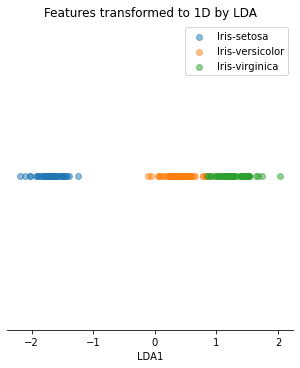

In [23]:
#Plot data point transformed to 1D
ax=sns.lmplot(data=lda_target,x='LDA1',y='y', hue='target', scatter_kws={'alpha':0.5},fit_reg=False)
ax._legend.remove()
plt.ylim(-0.05, 0.05)
plt.title("Features transformed to 1D by LDA")
plt.legend({"Iris-setosa":1, "Iris-versicolor":2, "Iris-virginica":3})
ax = plt.gca()
#hide y-axis 
ax.get_yaxis().set_visible(False)
ax.spines['left'].set_visible(False)